# AlphaPept API

Calling the AlphaPept LFQ implementation on MaxQuant output files.


## Installation

When installing AlphaPept we can use `pip install alphapept`. Note that this will install just the package and not the GUI-version etc.. Raw data import will only work for Windows unless you have Mono installed for Mac. See the GitHub page for more [information](https://github.com/MannLabs/alphapept) about the different modes for installation.

For this notebook one will need `wget` to download the external files.


## Example file

The example file is from PXD006109 and was run with MaxQuant 2.0.3.1. For LFQ the minimum ratio was set to two.


## Requirements

To run this notebook, install `wget` to download the example files. Additionally required is `pandas`, `matplotlib`.

In [1]:
import os 
import wget
import pandas as pd

external_files = {}

external_files['evidence.txt'] = 'https://datashare.biochem.mpg.de/s/KAbRdiHX7rWlTAB/download'
external_files['proteinGroups.txt'] = 'https://datashare.biochem.mpg.de/s/XNbraDaneZlztzg/download'

for file in external_files:
    target = os.path.join('.', file)
    if not os.path.isfile(target):
        print(f'Downloading {file} to {target}')
        wget.download(external_files[file], target)

In [2]:
import alphapept

print(alphapept.__version__)

0.3.33


In [3]:
from alphapept.quantification import protein_profile_parallel_mq

## Inspecting function header
We have two relevant parameters: `minimum_ratios` for the second step of LFQ (extracting optimal protein ratios) and `minimum_occurence` for the delayed normalization step (first step).

When calling the function we set the `minimum_ratios` to two to better compare to the MaxQuant output. Note that the default value for AlphaPept is 1. This typically leads to less proteins being thrown overboard.

In [4]:
help(protein_profile_parallel_mq)

Help on function protein_profile_parallel_mq in module alphapept.quantification:

protein_profile_parallel_mq(evidence_path: str, protein_groups_path: str, minimum_ratios: int = 1, minimum_occurence: bool = None, delayed: bool = True, callback=None) -> pandas.core.frame.DataFrame
    Derives protein LFQ intensities from Maxquant quantified features.
    
    Args:
        evidence_path (str): path to the Maxquant standard output table evidence.txt.
        protein_groups_path (str): path to the Maxquant standard output table proteinGroups.txt.
        minimum_ratios (int): minimum ratios (LFQ parameter)
        minimum_occurence (int): minimum occurence (LFQ parameter)
        delayed (bool): toggle for delayed normalization (on/off)
        callback ([type], optional): [description]. Defaults to None.
    
    Raises:
        FileNotFoundError: if Maxquant files cannot be found.
    
    Returns:
        pd.DataFrame: table containing the LFQ intensities of each protein in each sample

In [5]:
%%time 

#This may take a while, one could use the callback to display progress

evidence_path = 'evidence.txt'
protein_group_path = 'proteinGroups.txt'

pt = protein_profile_parallel_mq(evidence_path, protein_group_path, minimum_ratios =2)

CPU times: total: 2min 30s
Wall time: 2min 36s


In [6]:
display(pt.head())

,PXD006109_HeLa12_1_LFQ,PXD006109_HeLa12_2_LFQ,PXD006109_HeLa12_3_LFQ,PXD006109_HeLa2_1_LFQ,PXD006109_HeLa2_2_LFQ,PXD006109_HeLa2_3_LFQ,PXD006109_HeLa12_1,PXD006109_HeLa12_2,PXD006109_HeLa12_3,PXD006109_HeLa2_1,PXD006109_HeLa2_2,PXD006109_HeLa2_3
sp|Q9H4B7|TBB1_HUMAN;CON__ENSEMBL:ENSBTAP00000025008,1.029732e+10,8.755959e+09,9.573093e+09,8.310881e+09,8.201077e+09,6.337594e+09,1.112542e+10,1.054613e+10,1.114396e+10,8.445702e+09,9.438297e+09,7.764095e+08
CON__ENSEMBL:ENSBTAP00000032840,7.040224e+08,6.781671e+08,7.535610e+08,6.333453e+08,6.516681e+08,7.258761e+08,5.938500e+08,9.562062e+08,9.172285e+08,4.973786e+08,5.003692e+08,6.816074e+08
CON__ENSEMBL:ENSBTAP00000034412,NaN,NaN,NaN,NaN,NaN,NaN,2.864177e+07,NaN,NaN,1.751218e+07,NaN,NaN
CON__P00735;sp|P00734|THRB_HUMAN,NaN,NaN,2.329190e+08,1.139405e+08,NaN,NaN,5.338931e+07,NaN,1.230555e+08,5.238931e+07,4.842652e+07,6.959884e+07
CON__P00761,5.228187e+09,4.487467e+09,5.430237e+09,5.067627e+09,3.972439e+09,3.820147e+09,5.622731e+09,3.262194e+09,8.321847e+08,7.111309e+09,7.952877e+09,3.224808e+09


## Comparing MaxQuant LFQ to AlphaPept LFQ

The sample file consists of 6 files of two different conditions (HeLa12_1, HeLa12_2, HeLa12_3) and (HeLa2_1, HeLa2_2, HeLa2_3).
We have intensities w/ and w/o the LFQ.

For comparison, we plot the distribution of the CV before LFQ and after LFQ, for the MaxQuant output and the AlphaPeptLFQ for one condition.

In [7]:
import matplotlib.pyplot as plt
import numpy as np

In [8]:
columns = ['PXD006109_HeLa2_1','PXD006109_HeLa2_2', 'PXD006109_HeLa2_3']

In [9]:
bins = np.linspace(0, 100, 100)

df = pd.read_csv('proteinGroups.txt', sep='\t')
df = df.replace(0, np.nan)

Mean CV for AlphaPept on MaxQuant w/o LFQ 35.04 % - n: 5,521
Mean CV for AlphaPept on MaxQuant w/ LFQ 11.13 % - n: 3,973
Mean CV for MaxQuant w/o LFQ 37.41 % - n: 5,447
Mean CV for MaxQuant w/ LFQ 12.18 % - n: 3,801


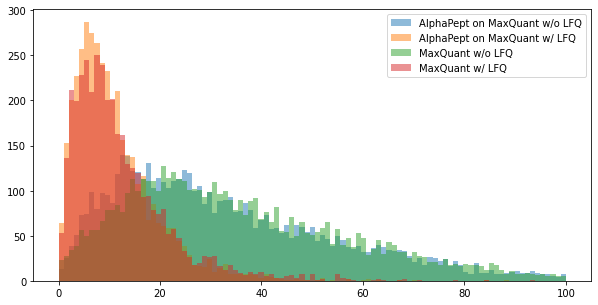

In [10]:
plt.figure(figsize=(10,5))

case = 'AlphaPept on MaxQuant w/o LFQ'
cv =  pt[columns].std(axis=1) / pt[columns].mean(axis=1) * 100
plt.hist(cv, bins=bins, alpha=0.5, label=case)
print(f'Mean CV for {case} {np.mean(cv):.2f} % - n: {(~cv.isna()).sum():,}')

case = 'AlphaPept on MaxQuant w/ LFQ'
lfq_columns = [_+'_LFQ' for _ in columns]
cv =  pt[lfq_columns].std(axis=1) / pt[lfq_columns].mean(axis=1) * 100
plt.hist(cv, bins=bins, alpha=0.5, label=case)
print(f'Mean CV for {case} {np.mean(cv):.2f} % - n: {(~cv.isna()).sum():,}')

columns_mq = ['Intensity Shotgun_02-01_1', 'Intensity Shotgun_02-01_2','Intensity Shotgun_02-01_3']


case = 'MaxQuant w/o LFQ'
cv =  df[columns_mq].std(axis=1) / df[columns_mq].mean(axis=1) * 100
plt.hist(cv, bins=bins, alpha=0.5, label=case)
print(f'Mean CV for {case} {np.mean(cv):.2f} % - n: {(~cv.isna()).sum():,}')

case = 'MaxQuant w/ LFQ'
lfq_columns_mq = ['LFQ i'+_[1:] for _ in columns_mq]
cv =  df[lfq_columns_mq].std(axis=1) / df[lfq_columns_mq].mean(axis=1) * 100
plt.hist(cv, bins=bins, alpha=0.5, label=case)
print(f'Mean CV for {case} {np.mean(cv):.2f} % - n: {(~cv.isna()).sum():,}')

plt.legend()
plt.show()

Observation: The CV decreases when applying the LFQ optimization. 
For the LFQ optimization, the mean CV for AlphaPept is slightly better (11.13% vs 12.18%) with a slightly more proteins (3,973 vs 3,801).